In [1]:
# Importare le librerie necessarie
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Caricare il dataset Iris
iris = load_iris(as_frame=True)

# Separare le feature (X) dal target (y)
X = iris.data
y = iris.target

# Ottenere i nomi delle feature e del target
features = X.columns
target = iris.target_names

# Creare un DataFrame combinato
df = pd.concat([X, y], axis=1)

# Visualizzare le prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Estrazione delle feature di interesse
features = ["sepal length (cm)", "sepal width (cm)"]

# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3, random_state=42)

# Normalizzazione dei dati
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

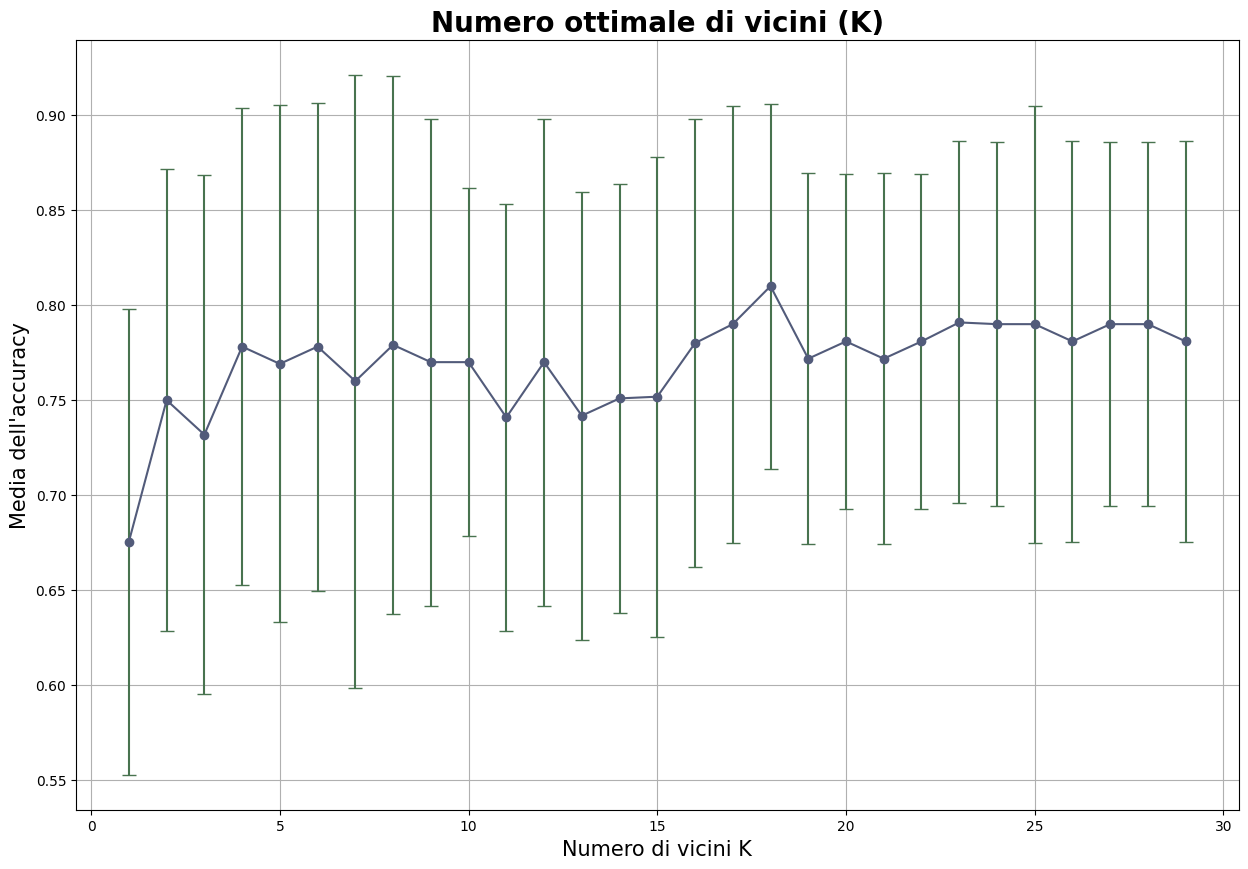

K: 28, accuracy: 0.7899999999999999
K: 27, accuracy: 0.7899999999999999
K: 25, accuracy: 0.79
K: 23, accuracy: 0.7909090909090909
K: 18, accuracy: 0.8099999999999999


In [25]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Creazione di una lista di valori di K per k-NN
k_list = list(range(1, 30, 1))

# Lista per memorizzare i punteggi di cross-validation
cv_scores = []

# Esecuzione della cross-validation a 10 fold
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores)

# Calcolo della media e della deviazione standard dei punteggi di cross-validation
mean_scores = [np.mean(score) for score in cv_scores]
std_scores = [np.std(score) for score in cv_scores]

# Plot della media dei punteggi di cross-validation con barre di errore
plt.figure(figsize=(15, 10))
plt.errorbar(k_list, mean_scores, yerr=std_scores, fmt='-o', color='#525b7a', ecolor='#48734f', capsize=5)
plt.title('Numero ottimale di vicini (K)', fontsize=20, fontweight='bold')
plt.xlabel('Numero di vicini K', fontsize=15)
plt.ylabel('Media dell\'accuracy', fontsize=15)
plt.grid(True)
plt.show()

# Identificazione dei 5 valori di K con i punteggi di accuracy più alti (meno negativi)
top_5_indices = np.argsort(mean_scores)[-5:]  # Indici dei 5 valori con punteggio più alto
top_5_k = [k_list[i] for i in top_5_indices]  # I 5 valori di K corrispondenti
top_5_scores = [mean_scores[i] for i in top_5_indices]  # I 5 punteggi medi corrispondenti

# Stampa dei risultati
for k, score in zip(top_5_k, top_5_scores):
    print(f"K: {k}, accuracy: {score}")

# Numero Ottimale di Vicini (K) per il Modello KNN

Questo grafico mostra l'andamento della media dell'accuratezza in funzione del numero di vicini \( K \) per un modello K-Nearest Neighbors (KNN). Le barre verticali rappresentano l'intervallo di confidenza dell'accuratezza, indicando la variabilità delle prestazioni del modello per ciascun valore di \( K \).

## Interpretazione del Grafico:

1. **Andamento della Media dell'Accuratezza**:
   - **Descrizione**: La linea blu mostra la media dell'accuratezza del modello per ciascun valore di \( K \). Si osserva un andamento oscillante, con l'accuratezza che aumenta o diminuisce leggermente a seconda del valore di \( K \).
   - **Interpretazione**: Un incremento dell'accuratezza per valori più bassi di \( K \) suggerisce che il modello è capace di catturare meglio le peculiarità dei dati, ma può essere suscettibile all'overfitting. Per valori più alti di \( K \), l'accuratezza tende a stabilizzarsi, indicando una maggiore generalizzazione ma con il rischio di underfitting.

2. **Intervallo di Confidenza**:
   - **Descrizione**: Le barre verdi verticali rappresentano l'intervallo di confidenza per ciascun valore di \( K \). Queste barre indicano la variabilità dell'accuratezza ottenuta tramite la validazione incrociata.
   - **Interpretazione**: Ampie barre di errore (come si vede per \( K \) basso) indicano una maggiore variabilità, suggerendo che il modello può essere meno stabile o che le sue prestazioni variano notevolmente con diverse partizioni del dataset. Con \( K \) più alto, le barre tendono a restringersi, mostrando una minore variabilità e una maggiore stabilità del modello.

## Conclusione
- **Scelta del Numero Ottimale di \( K \)**: Idealmente, si desidera scegliere un valore di \( K \) che offra un buon compromesso tra alta accuratezza e bassa variabilità. Nel grafico, si nota che tra \( K = 5 \) e \( K = 15 \) l'accuratezza è relativamente alta e la variabilità è moderata, suggerendo che questi potrebbero essere valori ottimali di \( K \).
- **Trade-off Bias-Varianza**: Valori più bassi di \( K \) possono portare a un modello con varianza elevata (eccessiva sensibilità ai dati di addestramento), mentre valori più alti di \( K \) possono portare a un bias elevato (modello troppo semplice che non cattura la complessità dei dati). La scelta del \( K \) ottimale deve bilanciare questi due aspetti.

Questo grafico è utile per identificare il numero di vicini \( K \) che permette al modello KNN di avere buone prestazioni generali senza essere troppo suscettibile alla variabilità dei dati di addestramento.

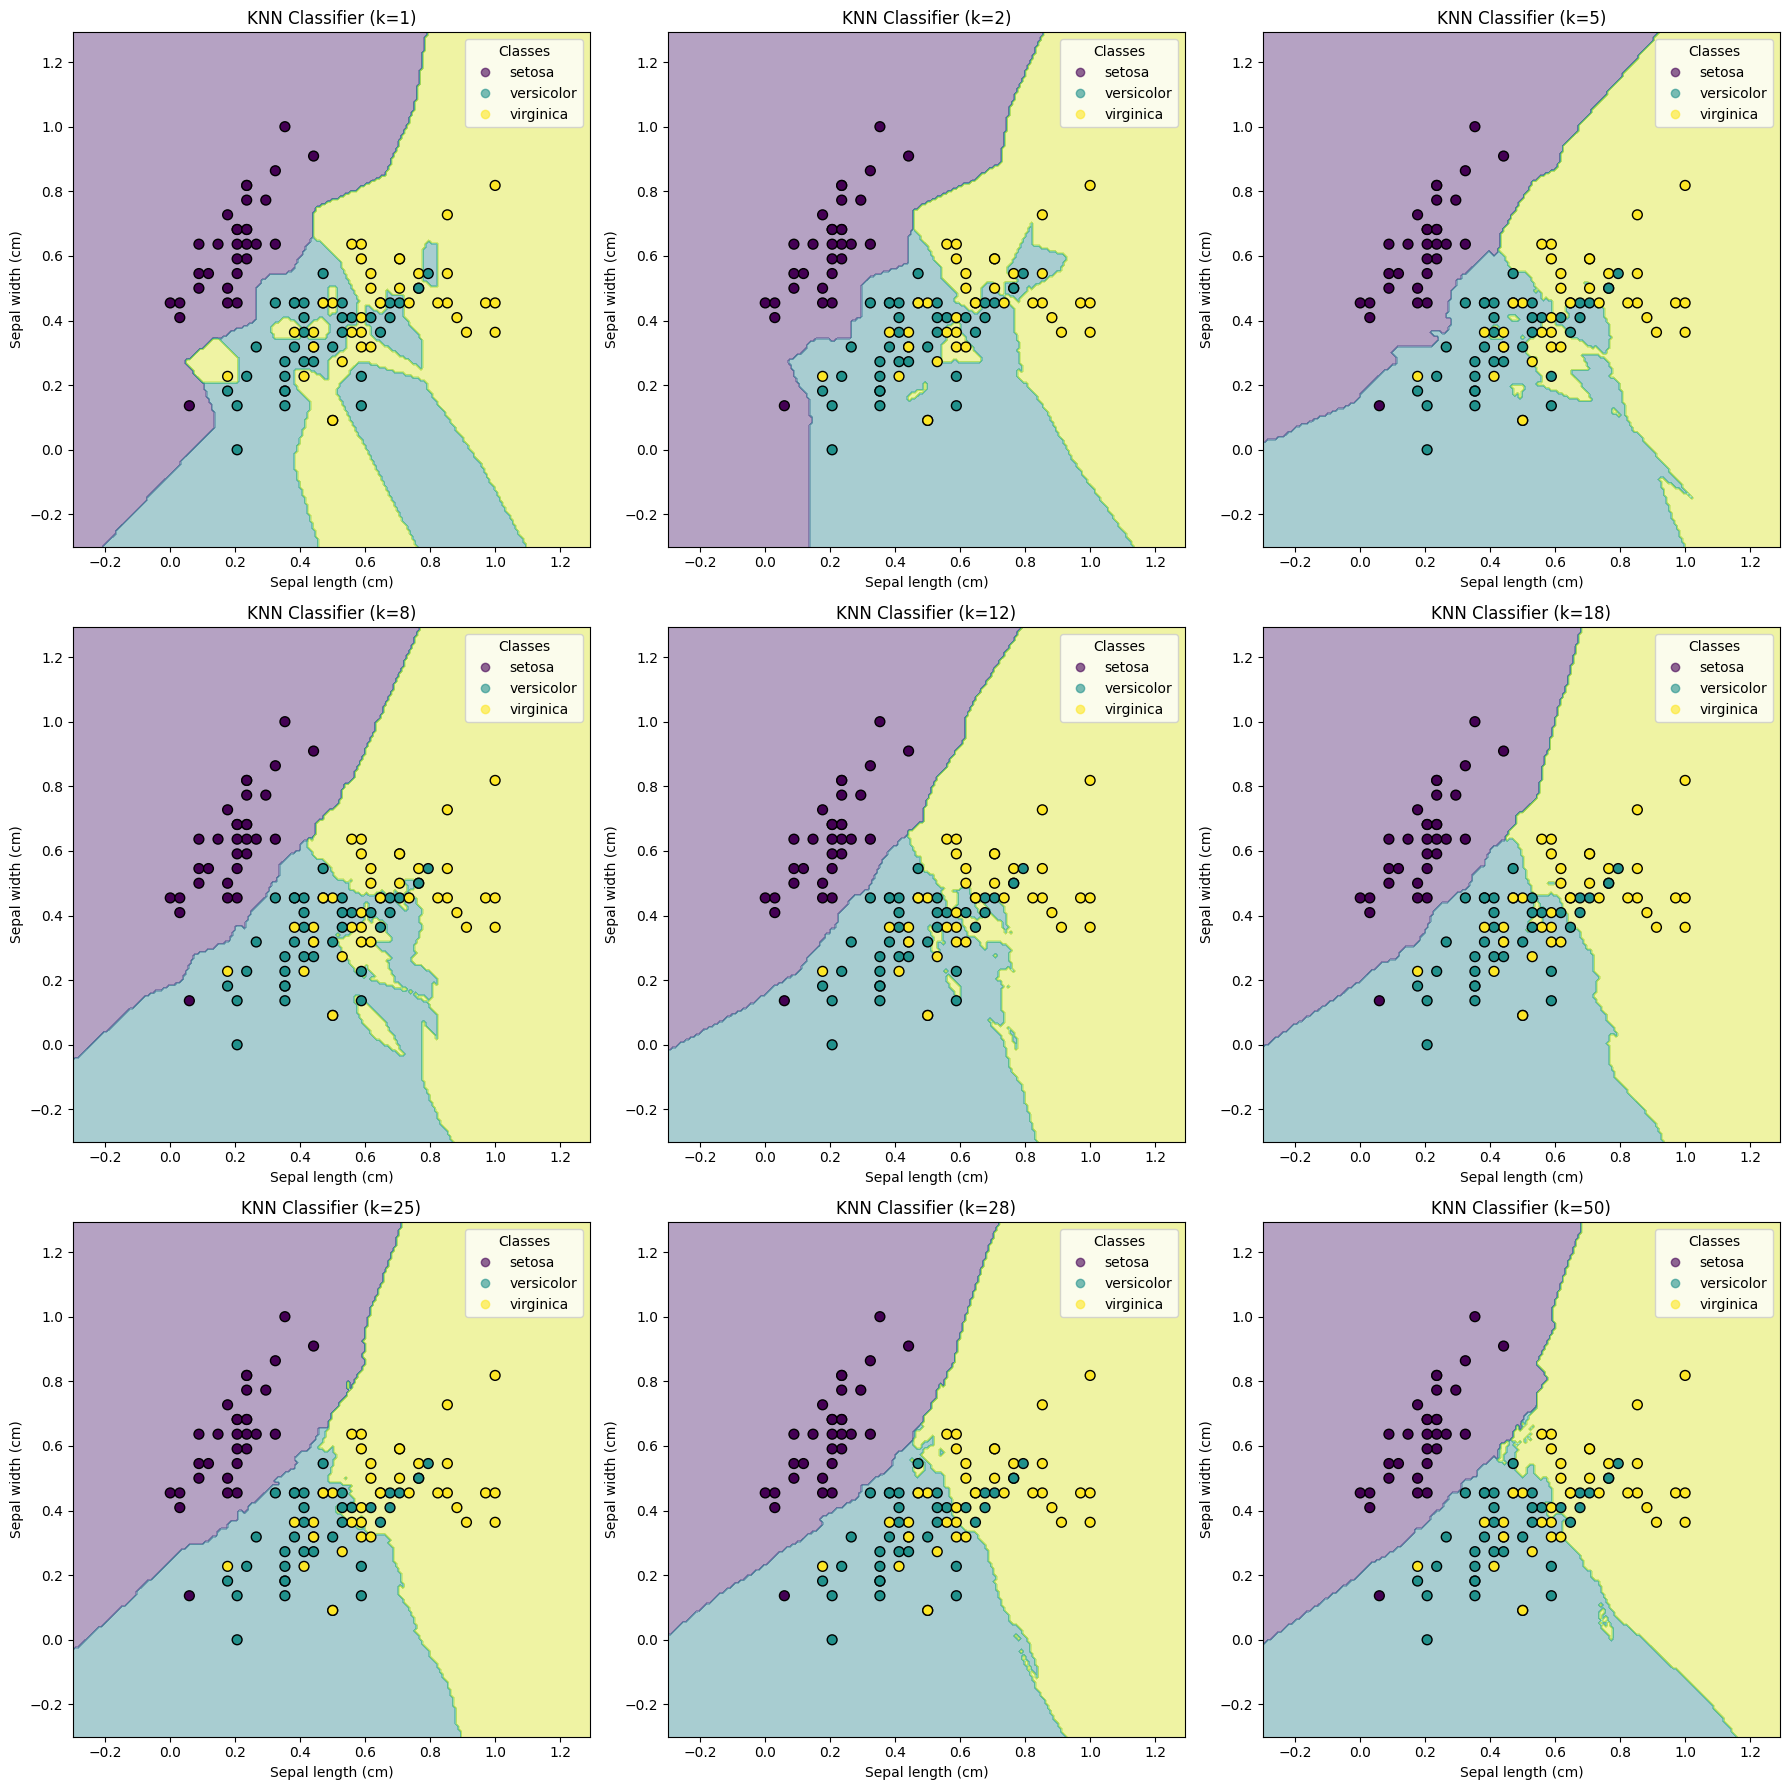

In [4]:
# Lista dei valori di k da testare
k_values = [1, 2, 5, 8, 12, 18, 25, 28, 50]

# Nomi degli assi
xlabel = 'Sepal length (cm)'
ylabel = 'Sepal width (cm)'

# Definizione della funzione per tracciare le decision boundaries utilizzando contourf
def plot_decision_boundaries(X, y, model, ax, title):
    h = 0.008  # Passo della mesh
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Creazione manuale della legenda
    handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
    ax.legend(handles=handles, labels=list(iris.target_names), title="Classes")

# Creazione della figura
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Iterazione sui valori di k e plot delle decision boundaries
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', n_jobs=-1)
    knn.fit(X_train_scaled, y_train)
    ax = axes[i // 3, i % 3]  # Posizione nella griglia 2x3
    plot_decision_boundaries(X_train_scaled, y_train, knn, ax, f'KNN Classifier (k={k})')

plt.tight_layout()
plt.show()

# Interpretazione dei Confini di Decisione per il Modello KNN

Questo grafico rappresenta nove diverse visualizzazioni dei confini di decisione di un modello K-Nearest Neighbors (KNN) applicato al dataset Iris, considerando solo le caratteristiche `sepal_length` e `sepal_width`. Ogni subplot rappresenta il comportamento del modello per un diverso valore di \( k \), variabile che determina il numero di vicini considerati dal modello per classificare un nuovo punto.

## Interpretazione dei Subplot:

1. **\( k = 1 \)**:
   - **Descrizione**: Quando \( k \) è pari a 1, ogni punto viene classificato in base al suo singolo vicino più vicino. Questo porta a confini di decisione molto irregolari e complessi, che seguono fedelmente i dati di addestramento.
   - **Interpretazione**: Il modello è altamente flessibile, ma anche estremamente suscettibile all'overfitting, poiché può adattarsi molto ai punti rumorosi o a piccole variazioni nei dati.

2. **\( k = 2 \) e \( k = 5 \)**:
   - **Descrizione**: Aumentando \( k \), i confini di decisione diventano più lisci e meno complessi. Con \( k = 5 \), il modello inizia a generalizzare meglio.
   - **Interpretazione**: Il modello diventa meno sensibile ai dati rumorosi e inizia a formare regioni più ampie e coerenti per ogni classe, riducendo il rischio di overfitting.

3. **\( k = 8 \) e \( k = 12 \)**:
   - **Descrizione**: Per valori di \( k \) tra 8 e 12, i confini di decisione continuano a lisciarsi e le aree di confine tra le classi diventano più regolari. Il modello tende a ignorare piccole fluttuazioni nei dati.
   - **Interpretazione**: Questo rappresenta un buon compromesso tra bias e varianza. Il modello è in grado di generalizzare bene senza sacrificare troppa accuratezza.

4. **\( k = 18 \) e \( k = 25 \)**:
   - **Descrizione**: Aumentando ancora di più \( k \), i confini diventano ancora più regolari e le decisioni di classificazione sono influenzate da un numero maggiore di punti vicini.
   - **Interpretazione**: Il modello inizia a diventare troppo rigido (aumento del bias), il che potrebbe portare a un underfitting, specialmente se il numero di classi è piccolo o se i dati non sono ben separati.

5. **\( k = 28 \) e \( k = 50 \)**:
   - **Descrizione**: Con \( k = 28 \) e soprattutto con \( k = 50 \), il modello diventa molto conservativo. I confini di decisione sono estremamente lisci e non tengono conto delle peculiarità locali dei dati.
   - **Interpretazione**: Il modello ha un alto bias, ignorando completamente le piccole strutture nei dati. Questo porta a un underfitting significativo, dove il modello non riesce a catturare correttamente la complessità dei dati e può risultare in una scarsa performance.

## Conclusione
- **Overfitting vs. Underfitting**: I primi subplot (k piccoli) mostrano un chiaro caso di overfitting, dove il modello si adatta troppo ai dati di addestramento. Con l'aumento di \( k \), i confini di decisione diventano progressivamente più lisci, riducendo il rischio di overfitting ma aumentando il rischio di underfitting.
- **Scelta del valore di \( k \)**: Il valore di \( k \) che rappresenta il miglior compromesso dipende dal dataset specifico, ma generalmente valori intermedi di \( k \) (ad esempio tra 5 e 15) tendono a offrire un buon equilibrio tra la flessibilità del modello e la sua capacità di generalizzare.

Questa visualizzazione ti permette di capire meglio come la scelta del parametro \( k \) influisca sui confini di decisione del modello KNN e, di conseguenza, sulle sue prestazioni.

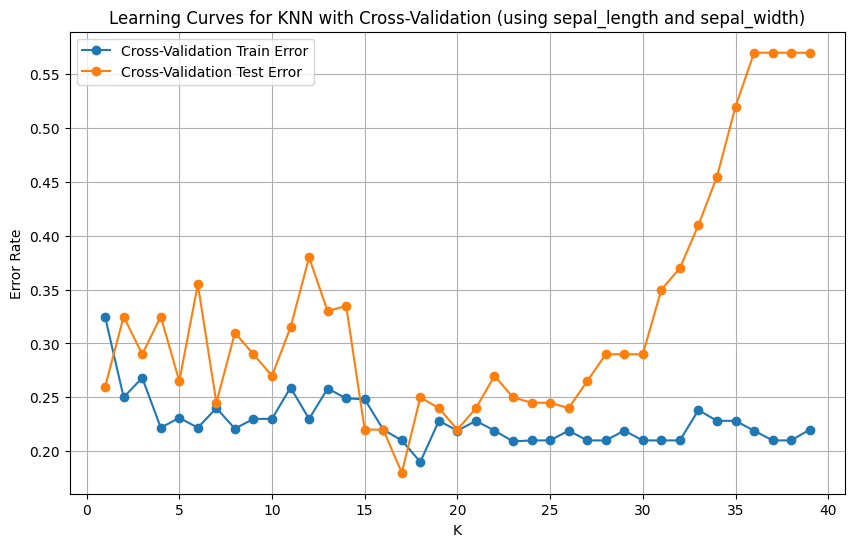

In [28]:
# Lista dei valori di k da testare
k_values = list(range(1, 40, 1))

train_errors = []
test_errors = []

# Addestrare il modello KNN per ogni valore di K e calcolare l'errore
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Usare cross_val_score per valutare il modello con 10-fold cross-validation sul train set
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')  # valutazione su 10 fold
    
    # Aggiungere l'errore alla lista degli errori
    train_errors.append(1 - cv_scores.mean())

    # Usare cross_val_score per valutare il modello con 10-fold cross-validation sul train set
    cv_scores = cross_val_score(knn, X_test_scaled, y_test, cv=10, scoring='accuracy')  # valutazione su 10 fold
    
    # Aggiungere l'errore alla lista degli errori
    test_errors.append(1 - cv_scores.mean())

# 4. Visualizzare le curve di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Cross-Validation Train Error', marker='o')
plt.plot(k_values, test_errors, label='Cross-Validation Test Error', marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Learning Curves for KNN with Cross-Validation (using sepal_length and sepal_width)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretazione delle Curve di Apprendimento per il Modello KNN

Questo grafico mostra le curve di apprendimento di un modello K-Nearest Neighbors (KNN) valutato tramite cross-validation per diversi valori di \( k \), utilizzando solo le caratteristiche `sepal_length` e `sepal_width` del dataset Iris. Il grafico traccia due curve:

1. **Cross-Validation Train Error (errore di addestramento)**: la curva blu mostra l'errore medio di addestramento per ciascun valore di \( k \).
2. **Cross-Validation Test Error (errore di test)**: la curva arancione mostra l'errore medio di cross-validation (test) per ciascun valore di \( k \).

## Interpretazione del Grafico

### Errore di Addestramento
- Con valori piccoli di \( k \) (vicini a 1), l'errore di addestramento è basso, indicando che il modello si adatta molto bene ai dati di addestramento. Tuttavia, c'è il rischio di overfitting, ossia che il modello si adatti troppo ai dati di addestramento e non generalizzi bene.
- Man mano che \( k \) aumenta, l'errore di addestramento cresce leggermente e poi si stabilizza. Questo perché, con \( k \) più grande, il modello diventa più semplice (media di più vicini) e tende a generalizzare meglio, riducendo il rischio di overfitting.

### Errore di Test
- L'errore di test (arancione) è inizialmente alto per valori piccoli di \( k \), il che può indicare che il modello non generalizza bene (overfitting).
- Intorno a \( k = 20 \), l'errore di test è al minimo, suggerendo che il modello ha trovato un buon compromesso tra bias e varianza.
- Con valori molto grandi di \( k \) (ad esempio, oltre \( k = 30 \)), l'errore di test aumenta drasticamente. Questo indica che il modello sta underfitting (ossia, è troppo semplice e non riesce a catturare le relazioni nei dati), perdendo la capacità di fare previsioni accurate.

## Conclusione
- **Trade-off Bias-Varianza**: Il grafico riflette il classico trade-off tra bias e varianza. Con valori piccoli di \( k \), il modello ha alta varianza e basso bias, mentre con valori grandi di \( k \), il bias aumenta e la varianza diminuisce.
- **Scelta di \( k \)**: Il valore di \( k \) ottimale è quello che minimizza l'errore di test (arancione). In questo caso, sembra che un valore di \( k \) compreso tra 15 e 25 offra il miglior compromesso, riducendo al minimo l'errore di generalizzazione.

Utilizzando queste informazioni, potresti selezionare un valore di \( k \) che bilancia in modo ottimale la capacità del modello di adattarsi ai dati di addestramento senza perdere la capacità di generalizzare a nuovi dati.